In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
import random
from keras.models import model_from_json
from keras.utils import np_utils

from tensorflow.keras.optimizers import SGD



import keras
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [12]:
# Loading Dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))


((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_clanum_classessses = y_train[:10]
num_classes

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,)    # We dont need it in 2D so we convert to 1D (We need 1st dimension so we use -1 and to flatten it we leave empty)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
def cifar_imgs(X, y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

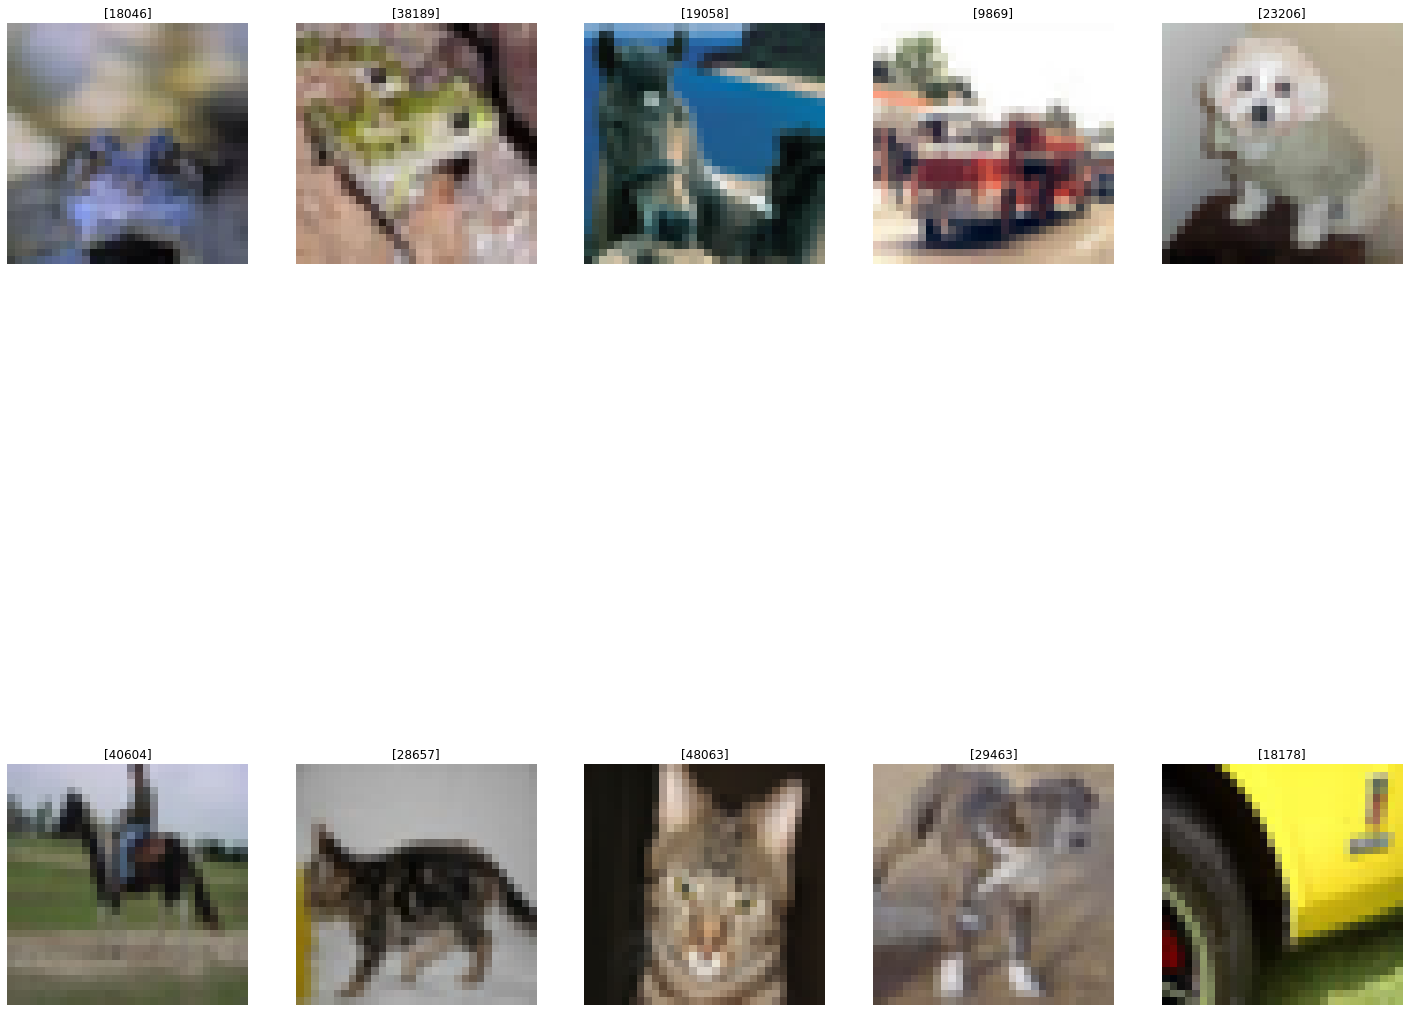

In [17]:
fig,axes = plt.subplots(2, 5, figsize=(25,25))  
axes=axes.reshape(-1)

for i in np.arange(0,2*5):   
    index=np.random.randint(0,len(X_train)) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title([index]) #Prints labels on top of the picture
    axes[i].axis('off')
 


In [18]:
cifar_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [19]:
def cifar_imgs(X, y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(cifar_classes[y[index]])

In [21]:
y_test = y_test.reshape(-1,)


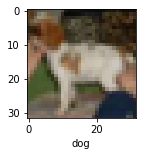

In [22]:
cifar_imgs(X_test, y_test, 12)

In [23]:
X_train[0]   # As the data is not normalized we have to narmalize it

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [24]:
# convert the data  to integer

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the Data 

X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
X_train[0]    # Data is normalized

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [26]:
# Creating CNN model
# We are using 2 layers Convolution (Detecting the feature) 
#filter = detects different feature
# kerneal size = we use 3*3 filter (matrix/ box)
# Relu it give o/p 0 to 1 and impart non linearity. Ctivation fn gives o/p of the node to given input.
# Adam gives good accuracy
#
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 64)               

In [27]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
cnn_model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4594 - accuracy: 0.4776
Epoch 2/10
1563/1563 [==============================] - 20s 12ms/step - loss: 1.1022 - accuracy: 0.6126
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9703 - accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8940 - accuracy: 0.6890
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8244 - accuracy: 0.7137
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7651 - accuracy: 0.7359
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7204 - accuracy: 0.7511
Epoch 8/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6734 - accuracy: 0.7663
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6328 - accuracy: 0.7811
Epoch 10/10
1563/1563 [==============================] - 18s 12m

In [29]:
scores = cnn_model.evaluate(X_test, y_test, verbose = 1)
print('Accuracy : ', scores[1])


313/313 [==============================] - 6s 3ms/step - loss: 0.9008 - accuracy: 0.7078
Accuracy :  0.7077999711036682


In [30]:
# Saving Model
import os
path = 'C:\\Users\\Abhijeet'
os.chdir(path)
os.getcwd()

'C:\\Users\\Abhijeet'

In [31]:
model_json = cnn_model.to_json()
with open('cnn_model.json', 'w') as json_file:
    json_file.write(model_json)

cnn_model.save_weights('model.h5')

In [32]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()


In [33]:
loaded_model = model_from_json(loaded_model_json)
print("Loaded model from disk")

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded the model weights")
 


Loaded model from disk
Loaded the model weights


In [34]:
y_pred = loaded_model.predict(X_test)
y_actual = [np.argmax(item) for item in y_pred]


'ship'

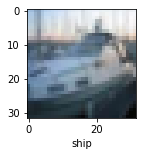

In [35]:
cifar_imgs(X_test, y_test, 2) 
classes[y_actual[2]]


# Improved CNN Model

In [76]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [77]:
def lr_changer(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:    
        lrate = 0.0003        
    return lrate

In [78]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# store the orifinal image before preprocessing

from keras.datasets import cifar10  
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)


num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [79]:
print("Label: ", y_test[0])

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [81]:
weight_decay = 1e-4
improved_model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('rrelu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()


ValueError: Input 0 of layer "conv2d_20" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

In [72]:
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
data_gen.fit(X_train)


In [47]:
batch_size = 64

opt_rms = tf.keras.optimizers.RMSprop(learning_rate =0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit(data_gen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch = X_train.shape[0] // batch_size,epochs=100,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_changer)])



Epoch 1/100
781/781 [==============================] - 130s 164ms/step - loss: 1.9010 - accuracy: 0.4270 - val_loss: 1.2049 - val_accuracy: 0.6025 - lr: 0.0010
Epoch 2/100
781/781 [==============================] - 130s 166ms/step - loss: 1.2947 - accuracy: 0.5893 - val_loss: 1.0691 - val_accuracy: 0.6665 - lr: 0.0010
Epoch 3/100
781/781 [==============================] - 133s 170ms/step - loss: 1.0924 - accuracy: 0.6553 - val_loss: 1.0096 - val_accuracy: 0.6890 - lr: 0.0010
Epoch 4/100
781/781 [==============================] - 138s 176ms/step - loss: 0.9963 - accuracy: 0.6893 - val_loss: 0.9746 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 5/100
781/781 [==============================] - 136s 174ms/step - loss: 0.9241 - accuracy: 0.7120 - val_loss: 0.9117 - val_accuracy: 0.7299 - lr: 0.0010
Epoch 6/100
781/781 [==============================] - 136s 175ms/step - loss: 0.8812 - accuracy: 0.7310 - val_loss: 0.8060 - val_accuracy: 0.7623 - lr: 0.0010
Epoch 7/100
781/781 [===================

Epoch 52/100
781/781 [==============================] - 136s 174ms/step - loss: 0.5925 - accuracy: 0.8469 - val_loss: 0.6367 - val_accuracy: 0.8423 - lr: 0.0010
Epoch 53/100
781/781 [==============================] - 133s 171ms/step - loss: 0.5842 - accuracy: 0.8513 - val_loss: 0.5984 - val_accuracy: 0.8535 - lr: 0.0010
Epoch 54/100
781/781 [==============================] - 136s 175ms/step - loss: 0.5925 - accuracy: 0.8499 - val_loss: 0.5747 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 55/100
781/781 [==============================] - 145s 186ms/step - loss: 0.5866 - accuracy: 0.8505 - val_loss: 0.6089 - val_accuracy: 0.8461 - lr: 0.0010
Epoch 56/100
781/781 [==============================] - 146s 187ms/step - loss: 0.5842 - accuracy: 0.8515 - val_loss: 0.6124 - val_accuracy: 0.8467 - lr: 0.0010
Epoch 57/100
781/781 [==============================] - 138s 177ms/step - loss: 0.5856 - accuracy: 0.8502 - val_loss: 0.6769 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 58/100
781/781 [============

In [52]:
scores_improved = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores_improved[1]*100,scores[0]))


79/79 [==============================] - 5s 65ms/step - loss: 0.4759 - accuracy: 0.8821

Test result: 88.210 loss: 0.476


In [60]:
import os
path = 'C:\\Users\\Abhijeet'
os.chdir(path)
os.getcwd()

'C:\\Users\\Abhijeet'

In [94]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')

In [95]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print("Loaded model from disk")

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded the model weights")
 

Loaded model from disk
Loaded the model weights


In [96]:
# # evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
scores = loaded_model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 6s 73ms/step - loss: 2.9691 - accuracy: 0.8821

Test result: 88.210 loss: 2.969


In [97]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_dict = dict({0:'airplane', 1:'automobile', 2:'bird', 3:'cat',4: 'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'})
